In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA


In [39]:
G = nx.karate_club_graph()
G.nodes[22]
#G = nx.erdos_renyi_graph(34,.2)

{'club': 'Officer'}

In [42]:
print(nx.adjacency_matrix(G).todense())

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


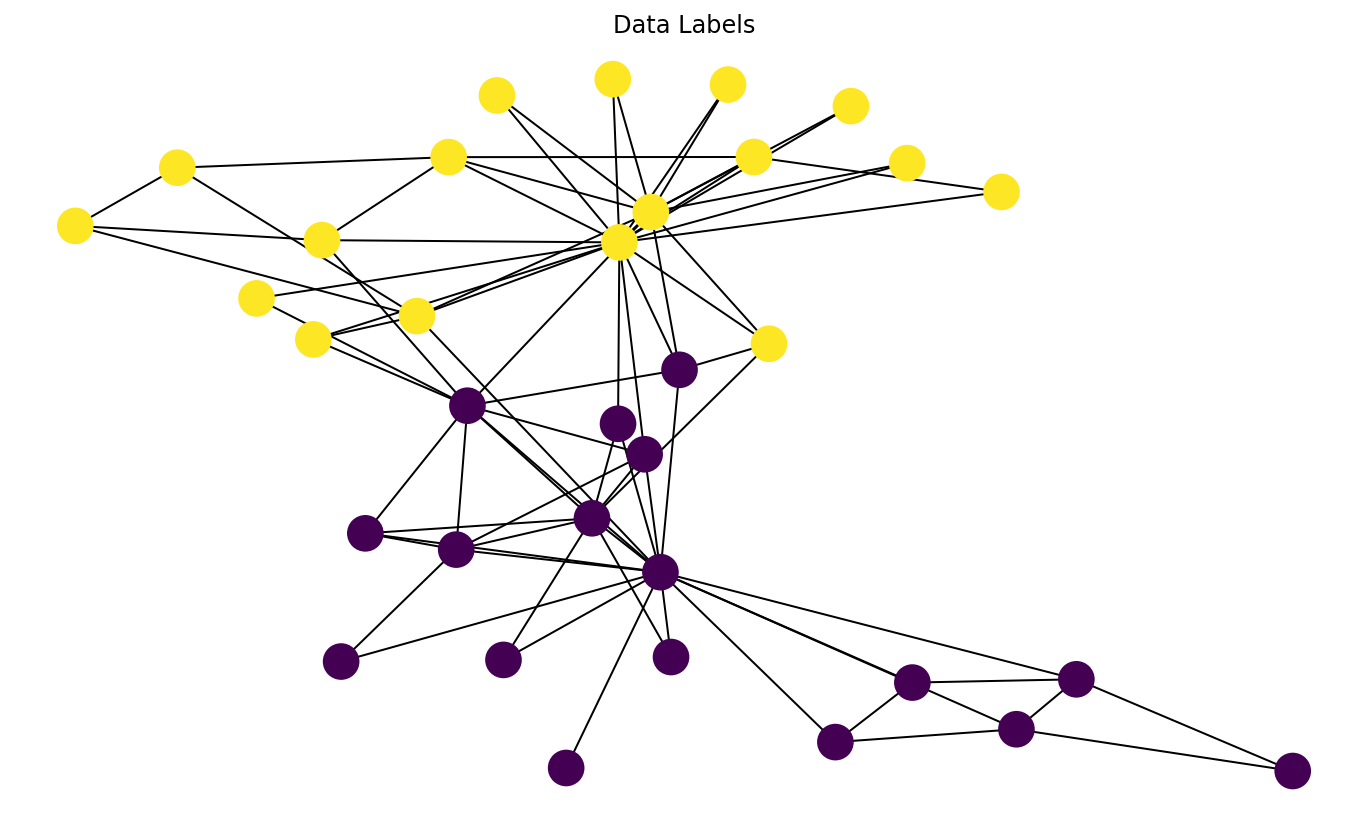

In [32]:
AM = (nx.adjacency_matrix(G)).todense()
NLM = (nx.normalized_laplacian_matrix(G)).todense()
LM = (nx.laplacian_matrix(G)).todense()

Labels = [G.nodes[i]['club'] != 'Mr. Hi' for i in G.nodes()]
plt.figure()
plt.title("Data Labels")
nx.draw(G, node_color=Labels )
plt.show()

AMva, AMve, = LA.eigh(AM)

NLMva, NLMve = LA.eigh(NLM)

LMva, LMve = LA.eigh(LM)

Fv = LMve[:,1]
xFv = [Fv.item(x) for x in range(34)]
NFv = NLMve[:,1]
xNFv = [NFv.item(x) for x in range(34)]


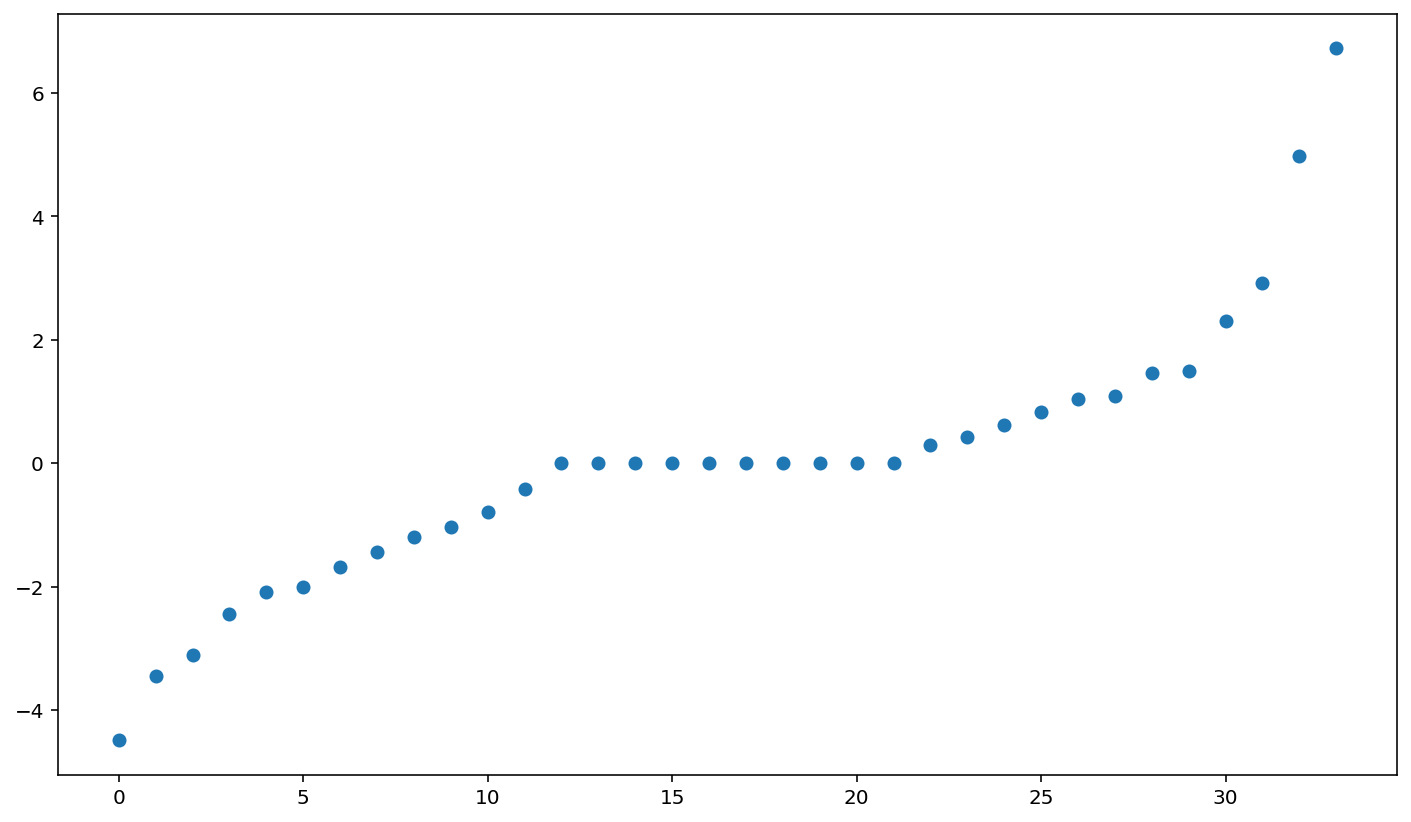

In [43]:
plt.plot(AMva,'o')

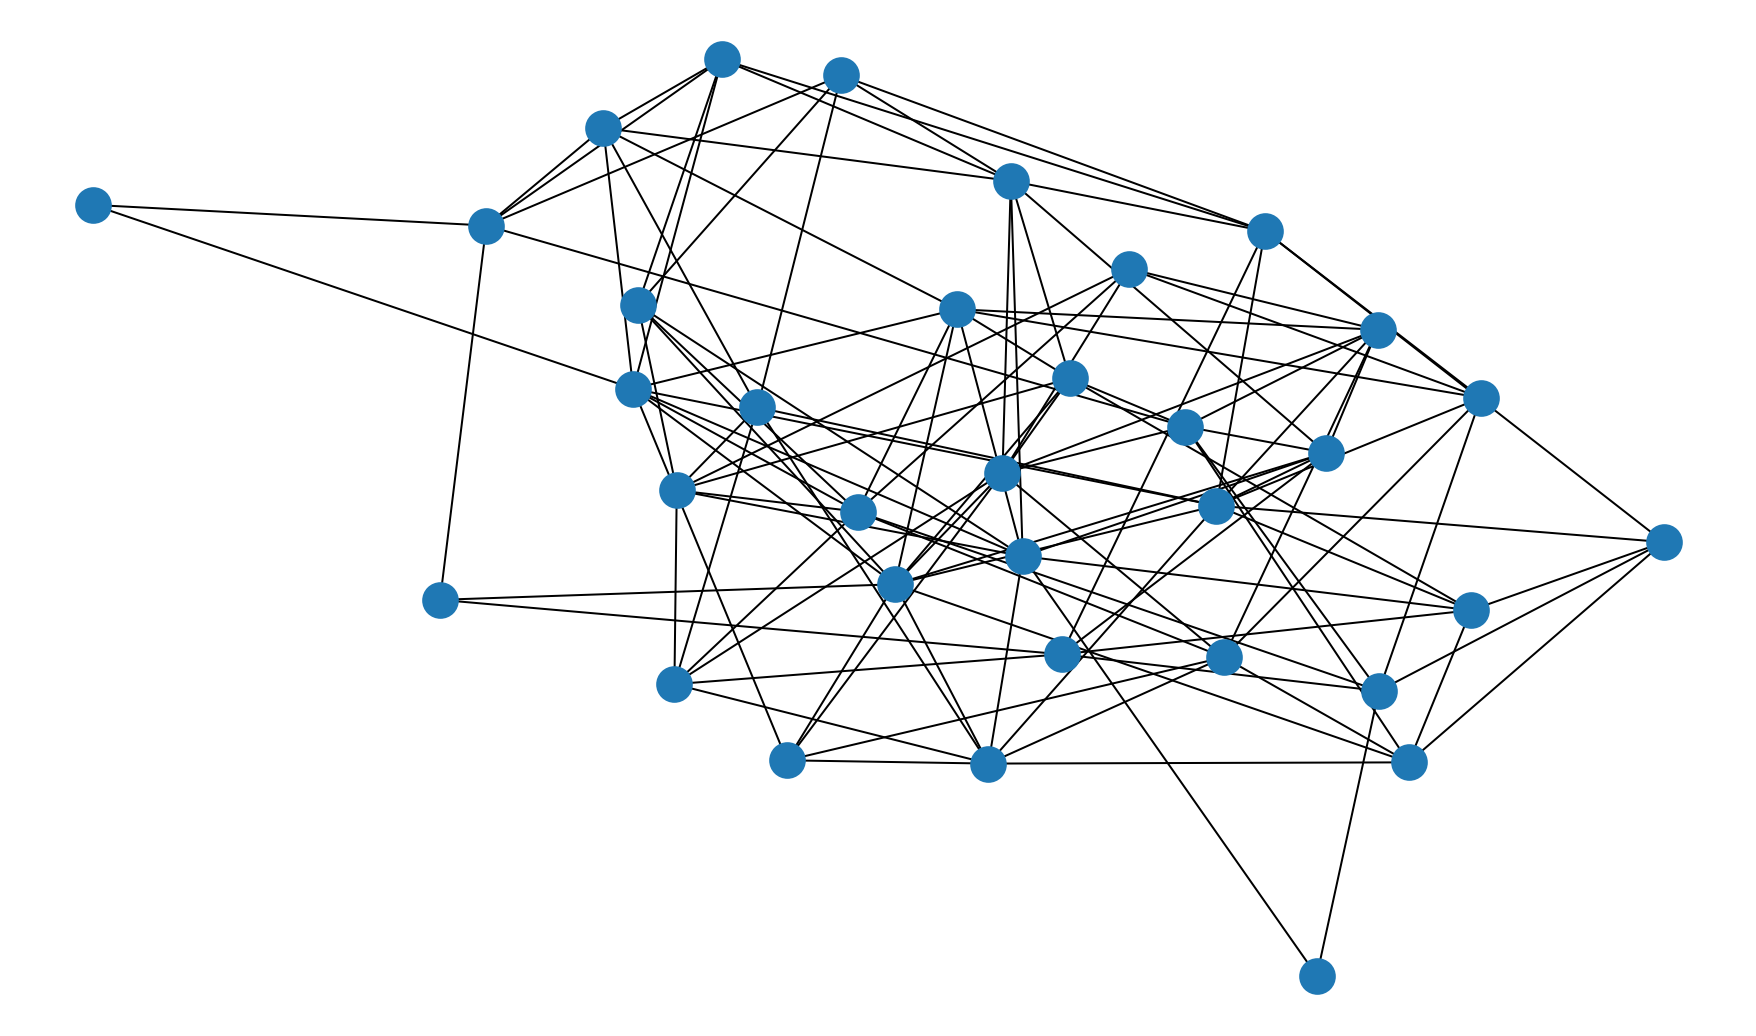

In [22]:
nx.draw(G)

In [49]:
print(f'G had {len(list(G.edges()))} edges!')
print(f'G had {len(list(G.nodes()))} nodes!')

p = (2*78)/(34*33)

print(p)

G had 78 edges!
G had 34 nodes!
0.13903743315508021


In [67]:
num_samples = 1000
number_of_nodes = 34
probability = .139

g_list = []

for i in range(num_samples):
    g = nx.erdos_renyi_graph(number_of_nodes,probability)
    if nx.is_connected(g):
        g_list.append(g)
    

In [68]:
densities = []
APL = []
trans = []

for g in g_list:
    densities.append(nx.density(g))
    APL.append(nx.average_shortest_path_length(g))
    trans.append(nx.transitivity(g))

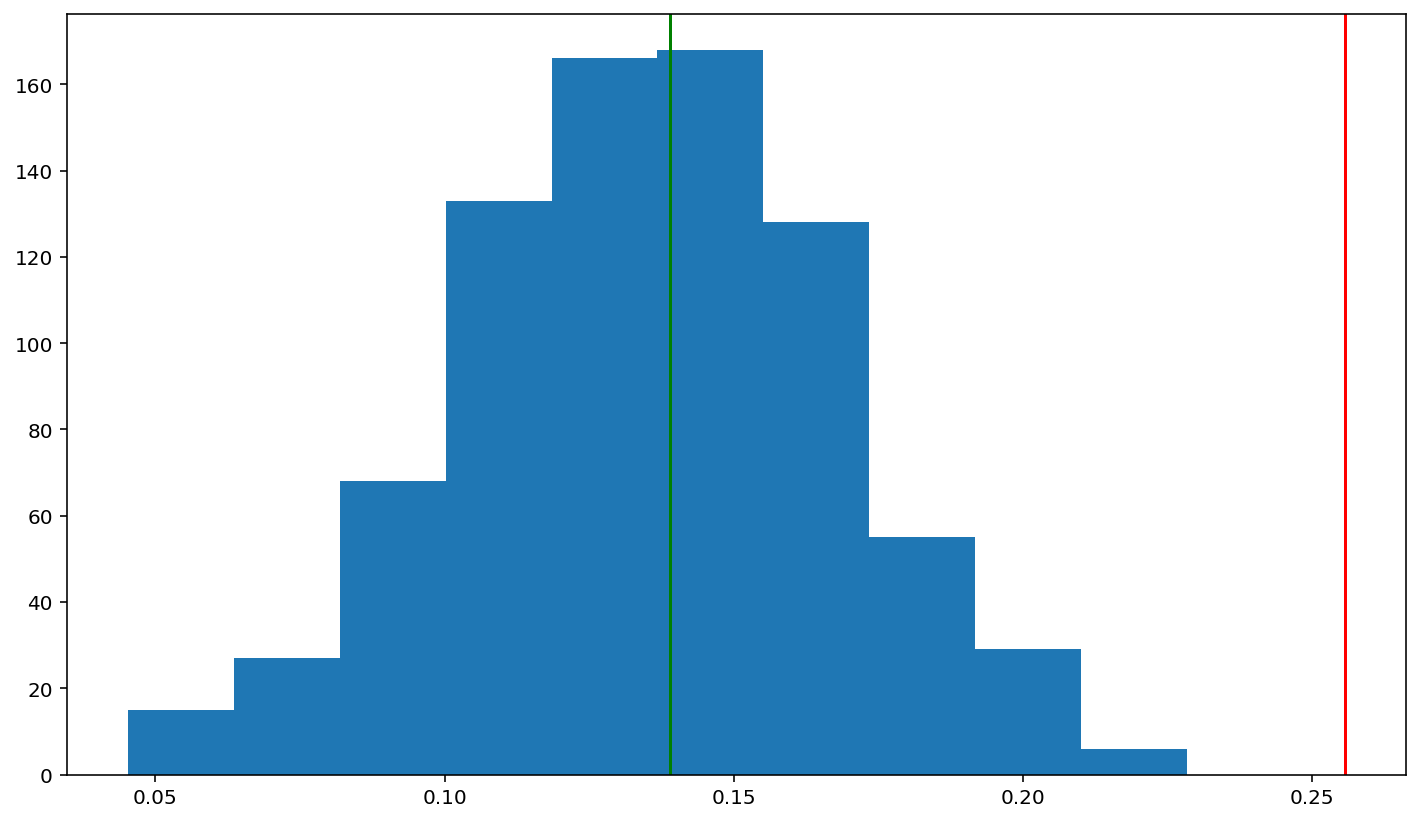

In [74]:
plt.hist(trans)
plt.axvline(x=probability,color='g')
plt.axvline(x=nx.transitivity(G),color='r')

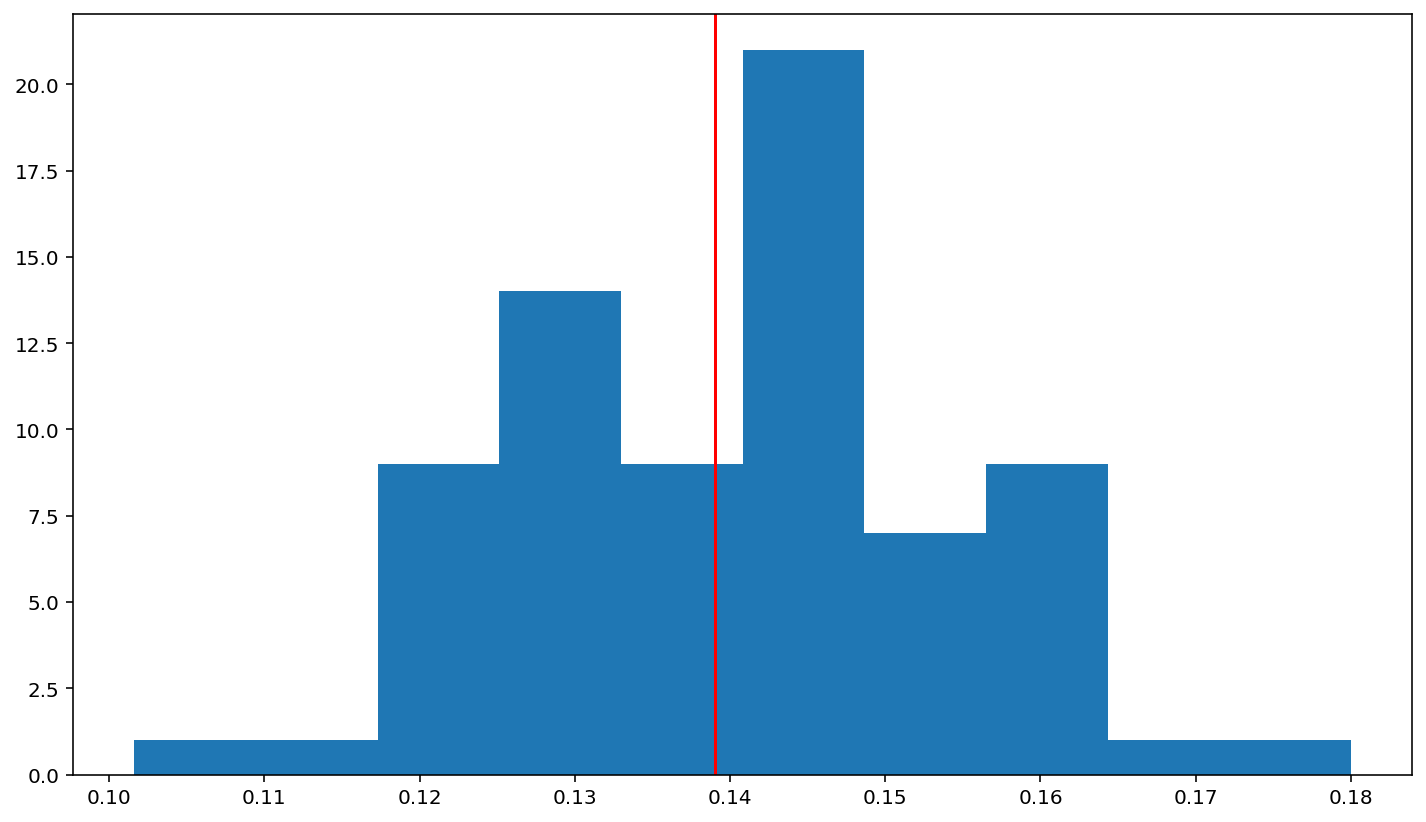

In [66]:
plt.hist(densities)
plt.axvline(x=nx.density(G),color='r')